# Glassnode Workbench

Welcome to the glassnode workbench, and easy Python-based environment for you to explore and play around with glassnode metrics.

If you are familiar with Python and Jupyter Notebooks, this should be a piece of cake.

# 1 . Setup

The API client that you will be using to fetch data is `gn`.

In order update it to your **API key**, simply add your key in the cell below and execute it. (You can execute a cell by either hitting the **RUN** button above or by pressing **Shift+Enter**).

In [1]:
GLASSNODE_API_KEY = '<YOUR-KEY>'
gn.set_api_key(GLASSNODE_API_KEY)

# 2. Fetching Data

In order to fetch data, the only function that you need to use is `gn.get()`. As an argument you pass the full path of the metric you want (see https://docs.glassnode.com), and optional arguments.

All arguments are specified in the above documentation as well, but in general these are the most common and important ones:

* `a`: The asset, e.g. `BTC`, `ETH` (if not specified, falls back to `BTC`)
* `i`: The interval resolution of the data, can be `24h` or `1h` (if not specified, falls back to `24h`)
* `s`: The "since" parameter, a datetime string, e.g. `2015-05-23` (if not specified, falls back to first available date)
* `u`: The "until" paramert, a datetime string, e.g. `2019-01-01` (if not specified, falls back to last available date)

### Example

In [2]:
sopr = gn.get('https://api.glassnode.com/v1/metrics/indicators/sopr', s='2018', u='2020-01-02')

# 3. Visualizing Data

You can simply call `plt.plot()` and pass the returned data:

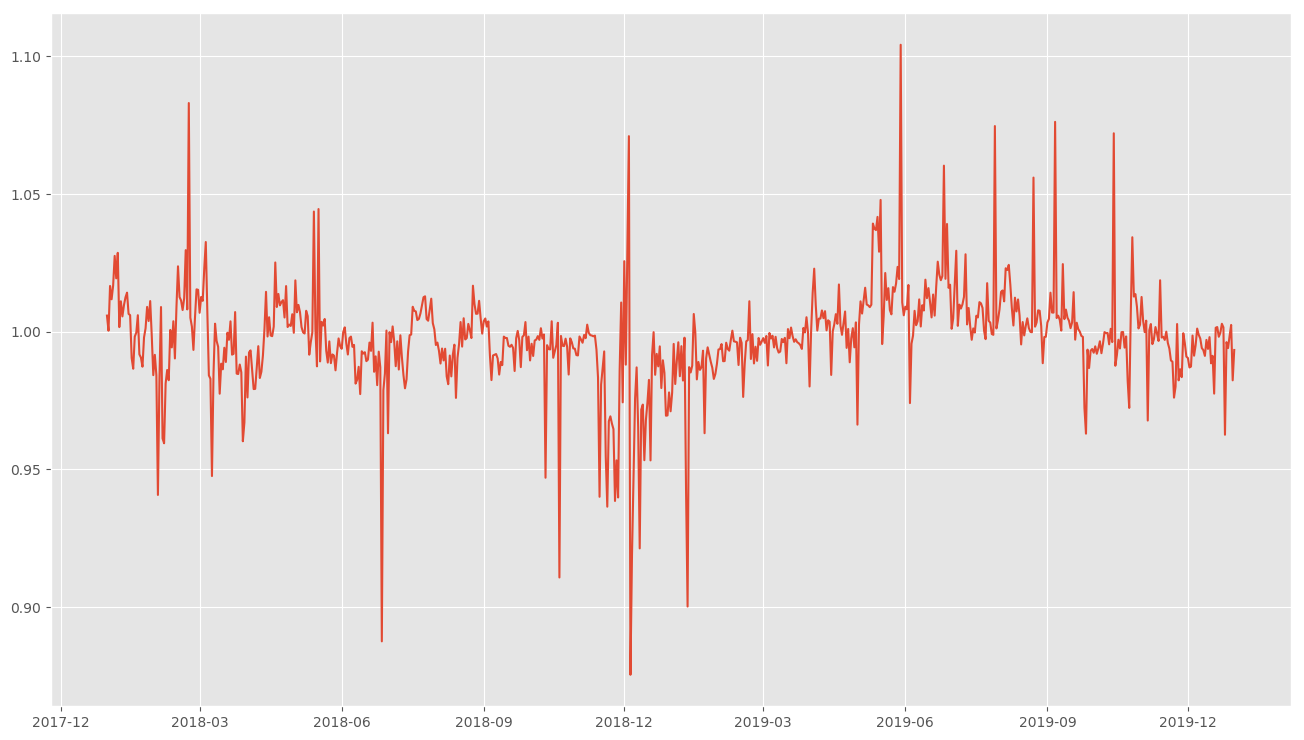

In [3]:
plt.plot(sopr)

# 4. Metric Manipulations

With the Glassnode Workbench you can easily manipulate metrics and create your own ones. In the following a couple of examples.

## 4.1. Moving Average/Median

**7d simple moving average:**

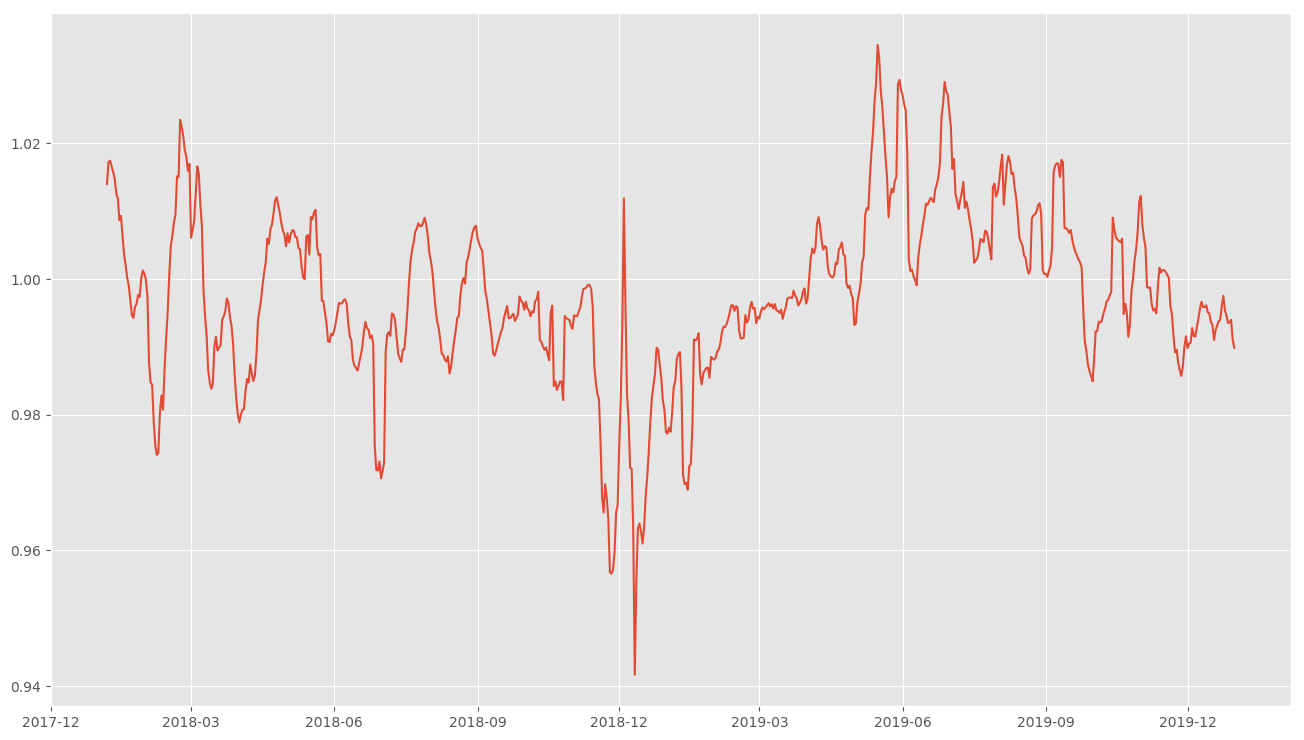

In [4]:
res = sopr.rolling(7).mean()
plt.plot(res)

**30d simple moving median:**

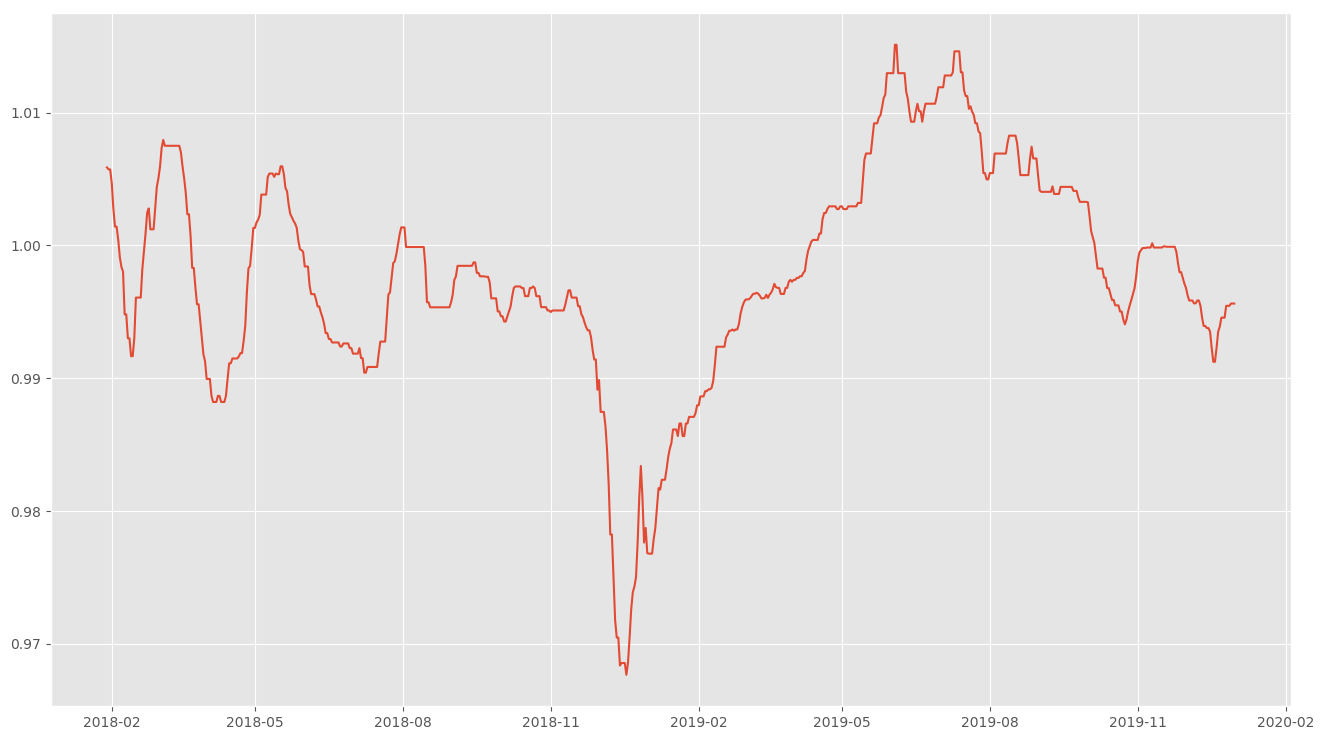

In [5]:
res = sopr.rolling(30).median()
plt.plot(res)

## 4.2. Cumulative Sum

In [6]:
new_addrs = gn.get('https://api.glassnode.com/v1/metrics/addresses/new_non_zero_count')

In [7]:
total_addrs = new_addrs.cumsum()

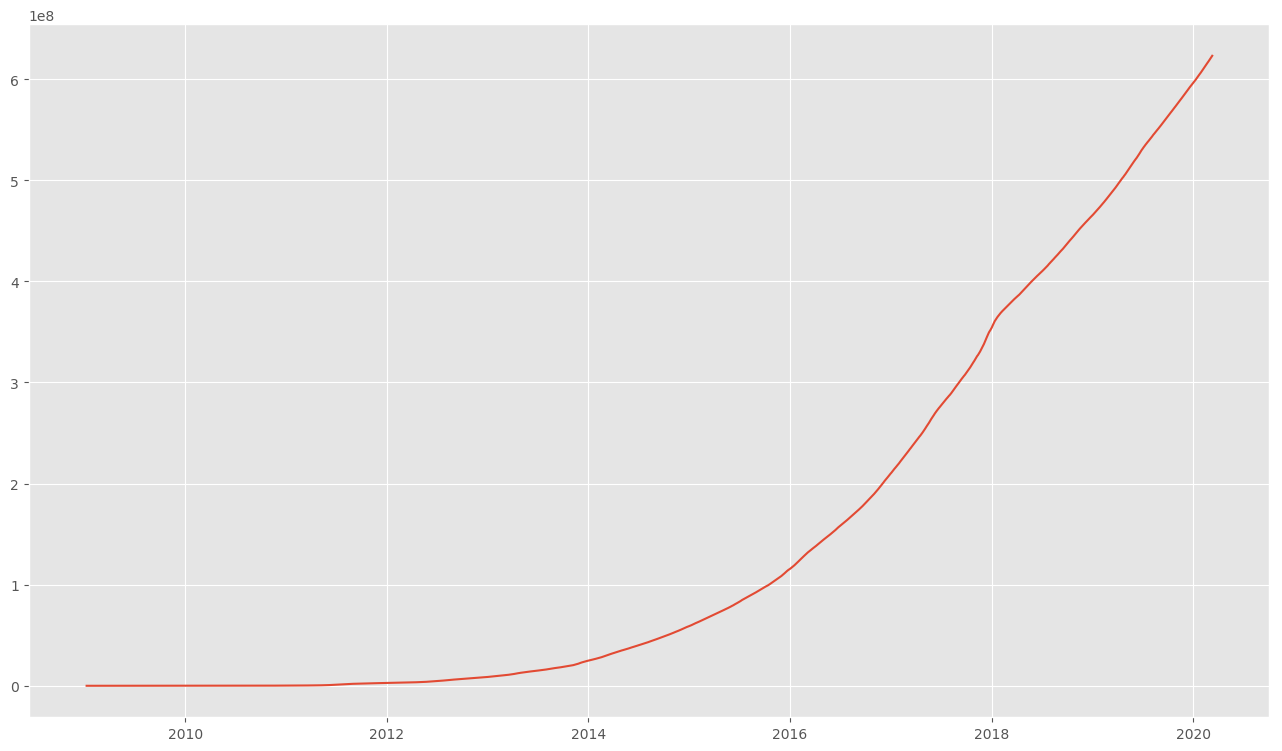

In [8]:
plt.plot(total_addrs)

## 4.3. Returns

In [9]:
price = gn.get('https://api.glassnode.com/v1/metrics/market/price_usd')

In [10]:
returns = price.pct_change()

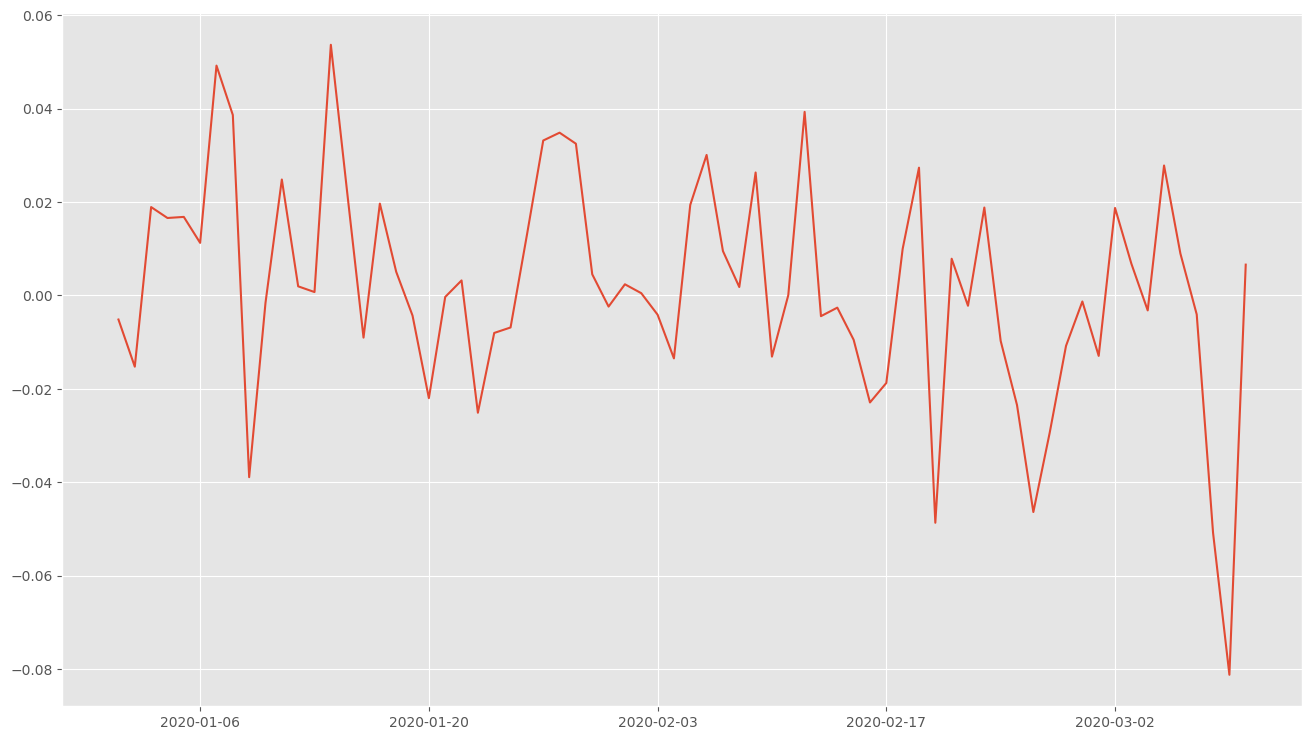

In [11]:
plt.plot(returns['2020':])

## 4.4. Multi-Metric Operations

### 4.4.1. Divide / Multiply

In [12]:
mcap = gn.get('https://api.glassnode.com/v1/metrics/market/marketcap_usd')
rcap = gn.get('https://api.glassnode.com/v1/metrics/market/marketcap_realized_usd')

In [13]:
res = mcap / rcap

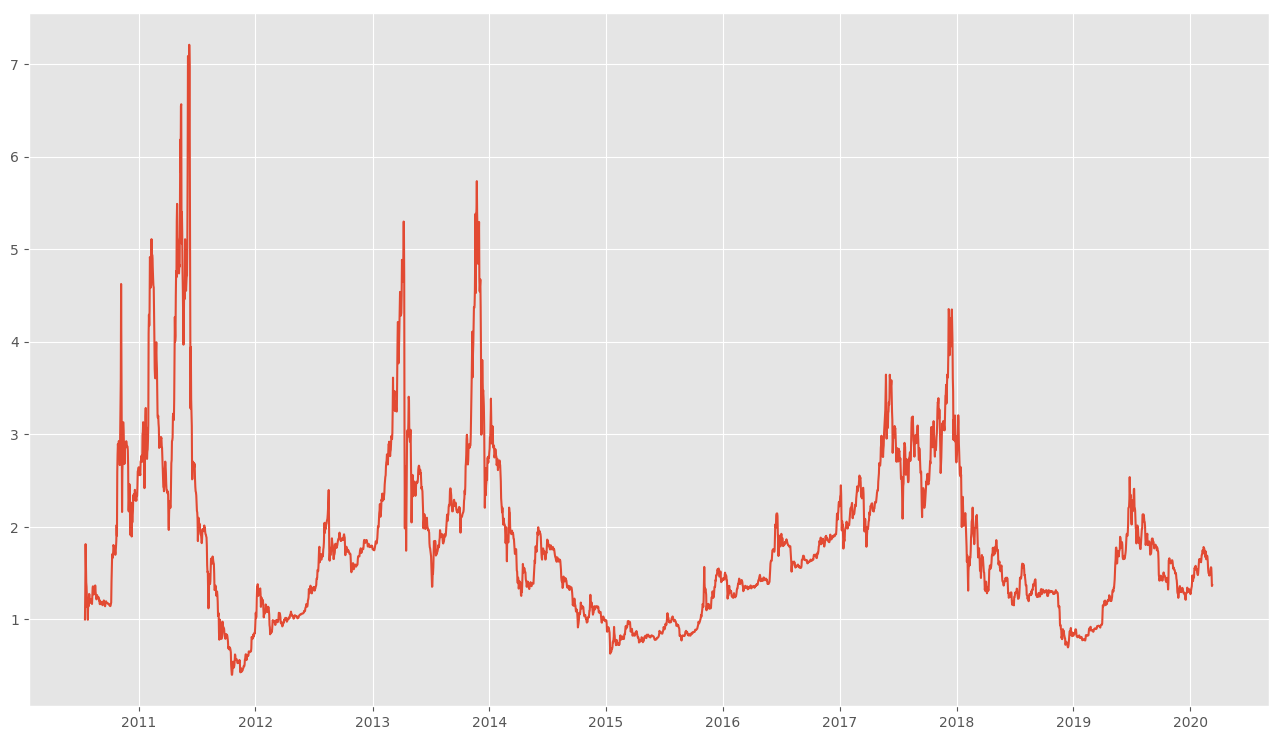

In [14]:
plt.plot(res)